In [30]:
# 분석 관련 패키지 다운
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [31]:
# 폰트 지정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [32]:
# 데이터 불러오기
df2023=pd.read_csv("C:\\Users\\gksgh\\OneDrive\\바탕 화면\\금천구상권분석데이터.csv", encoding='euc-kr')

In [33]:
# 데이터 검토
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        2423 non-null   int64  
 1   상권_구분_코드         2423 non-null   object 
 2   상권_구분_코드_명       2423 non-null   object 
 3   상권_코드            2423 non-null   int64  
 4   상권_코드_명          2423 non-null   object 
 5   서비스_업종_코드        2423 non-null   object 
 6   서비스_업종_코드_명      2423 non-null   object 
 7   당월_매출_금액         2423 non-null   float64
 8   당월_매출_건수         2423 non-null   int64  
 9   주중_매출_금액         2423 non-null   float64
 10  주말_매출_금액         2423 non-null   float64
 11  월요일_매출_금액        2423 non-null   int64  
 12  화요일_매출_금액        2423 non-null   int64  
 13  수요일_매출_금액        2423 non-null   int64  
 14  목요일_매출_금액        2423 non-null   int64  
 15  금요일_매출_금액        2423 non-null   int64  
 16  토요일_매출_금액        2423 non-null   float64
 17  일요일_매출_금액     

<AxesSubplot:xlabel='상권_구분_코드_명', ylabel='count'>

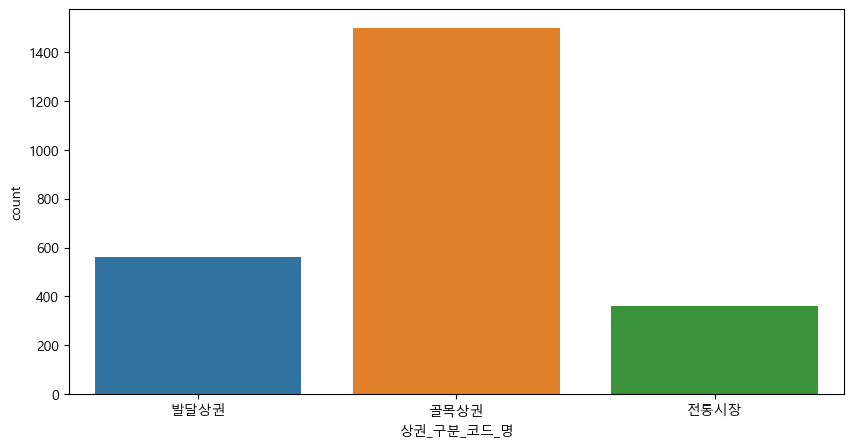

In [34]:
# 상권 분류 분석
plt.figure(figsize=(10,5))
sns.countplot(x=df2023['상권_구분_코드_명'])

<AxesSubplot:xlabel='서비스_업종', ylabel='점포수'>

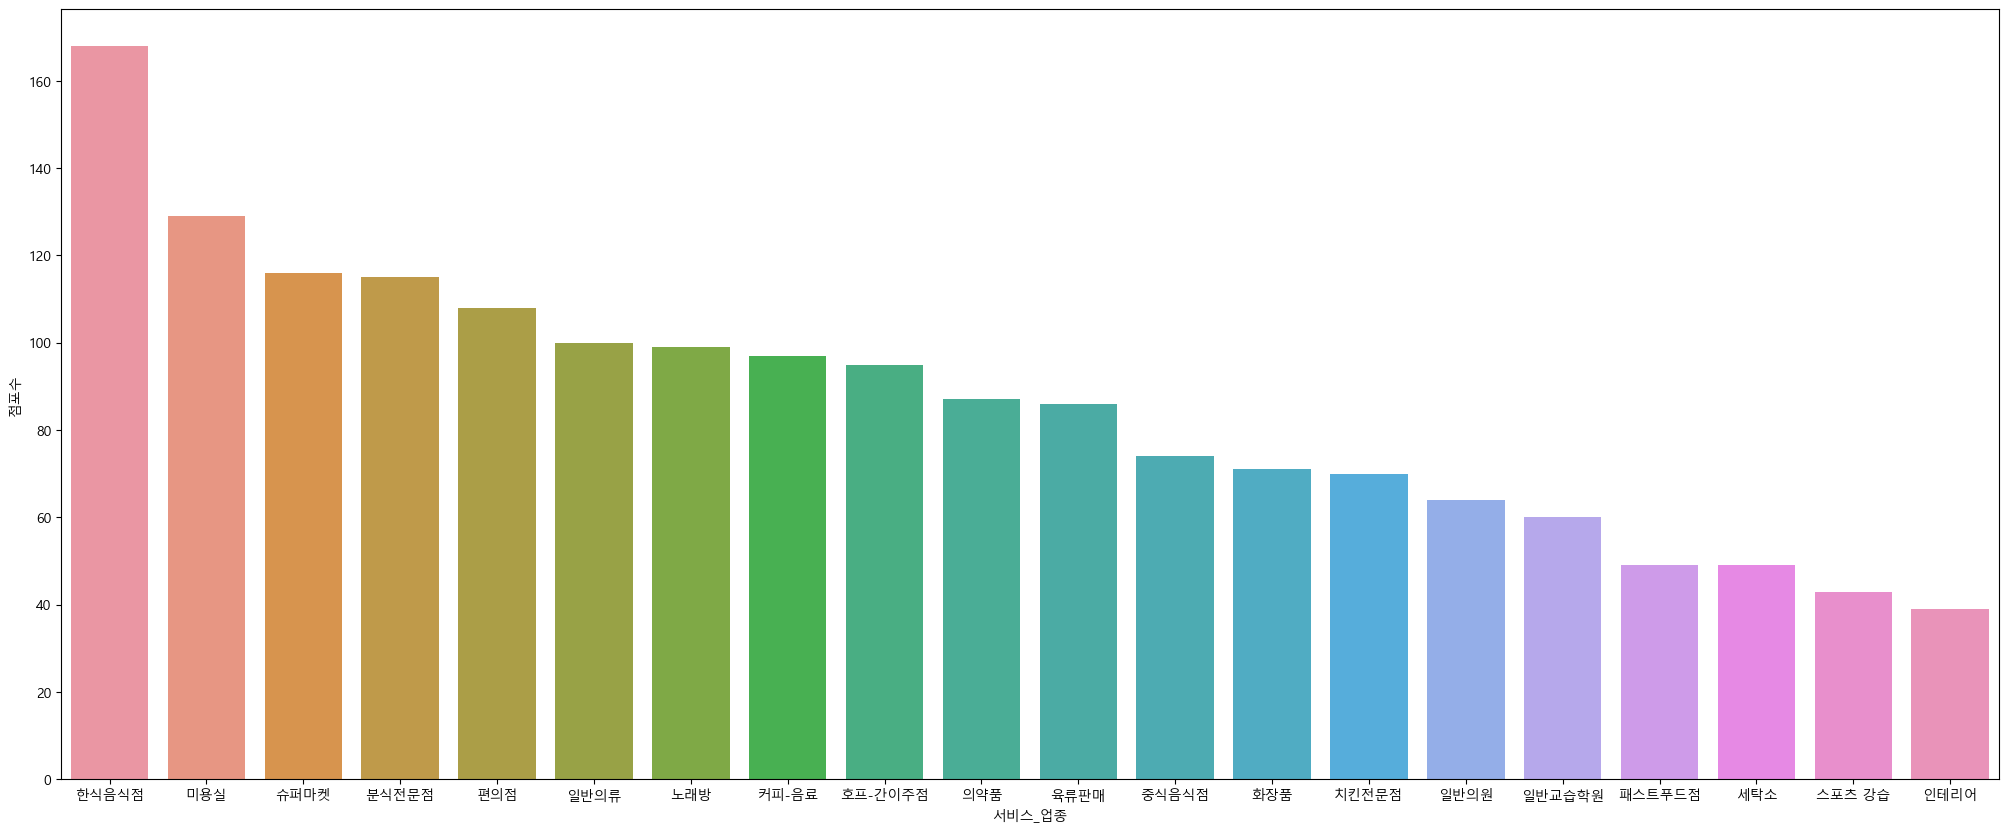

In [35]:
# 상권 종류 분석
service=df2023.groupby('서비스_업종_코드_명').agg({'기준_년분기_코드':'count', '점포수':sum},as_index=False).reset_index()
service.columns=['서비스_업종','개수','점포수']

service=service.sort_values('점포수',ascending=False).iloc[:20]

plt.figure(figsize=(25,10))
sns.barplot(x=service['서비스_업종'],y=service['점포수'])

<AxesSubplot:>

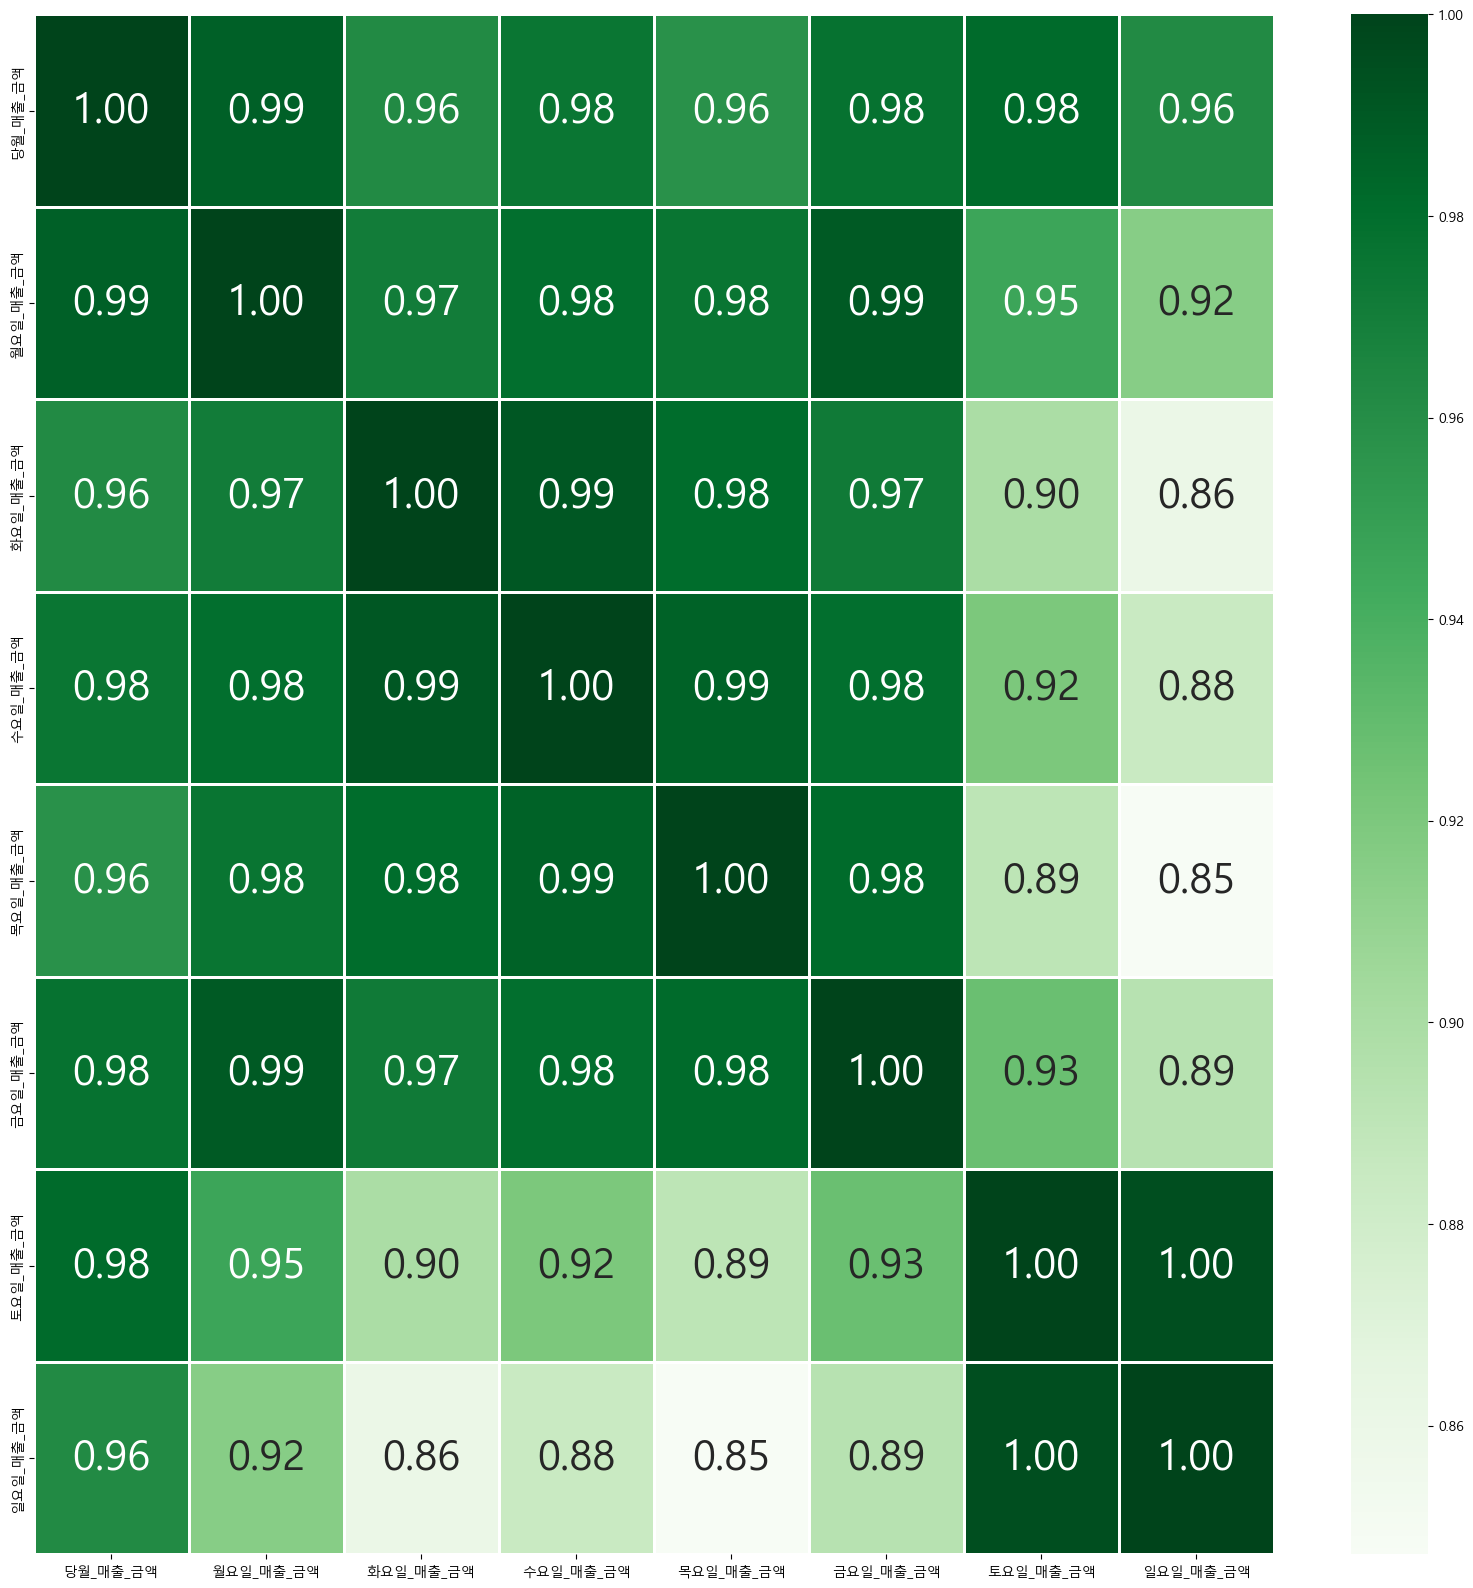

In [36]:
# 월매출과 요일별 매출 상관분석
week=df2023[['당월_매출_금액','월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액'
       ,'토요일_매출_금액','일요일_매출_금액']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = week, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

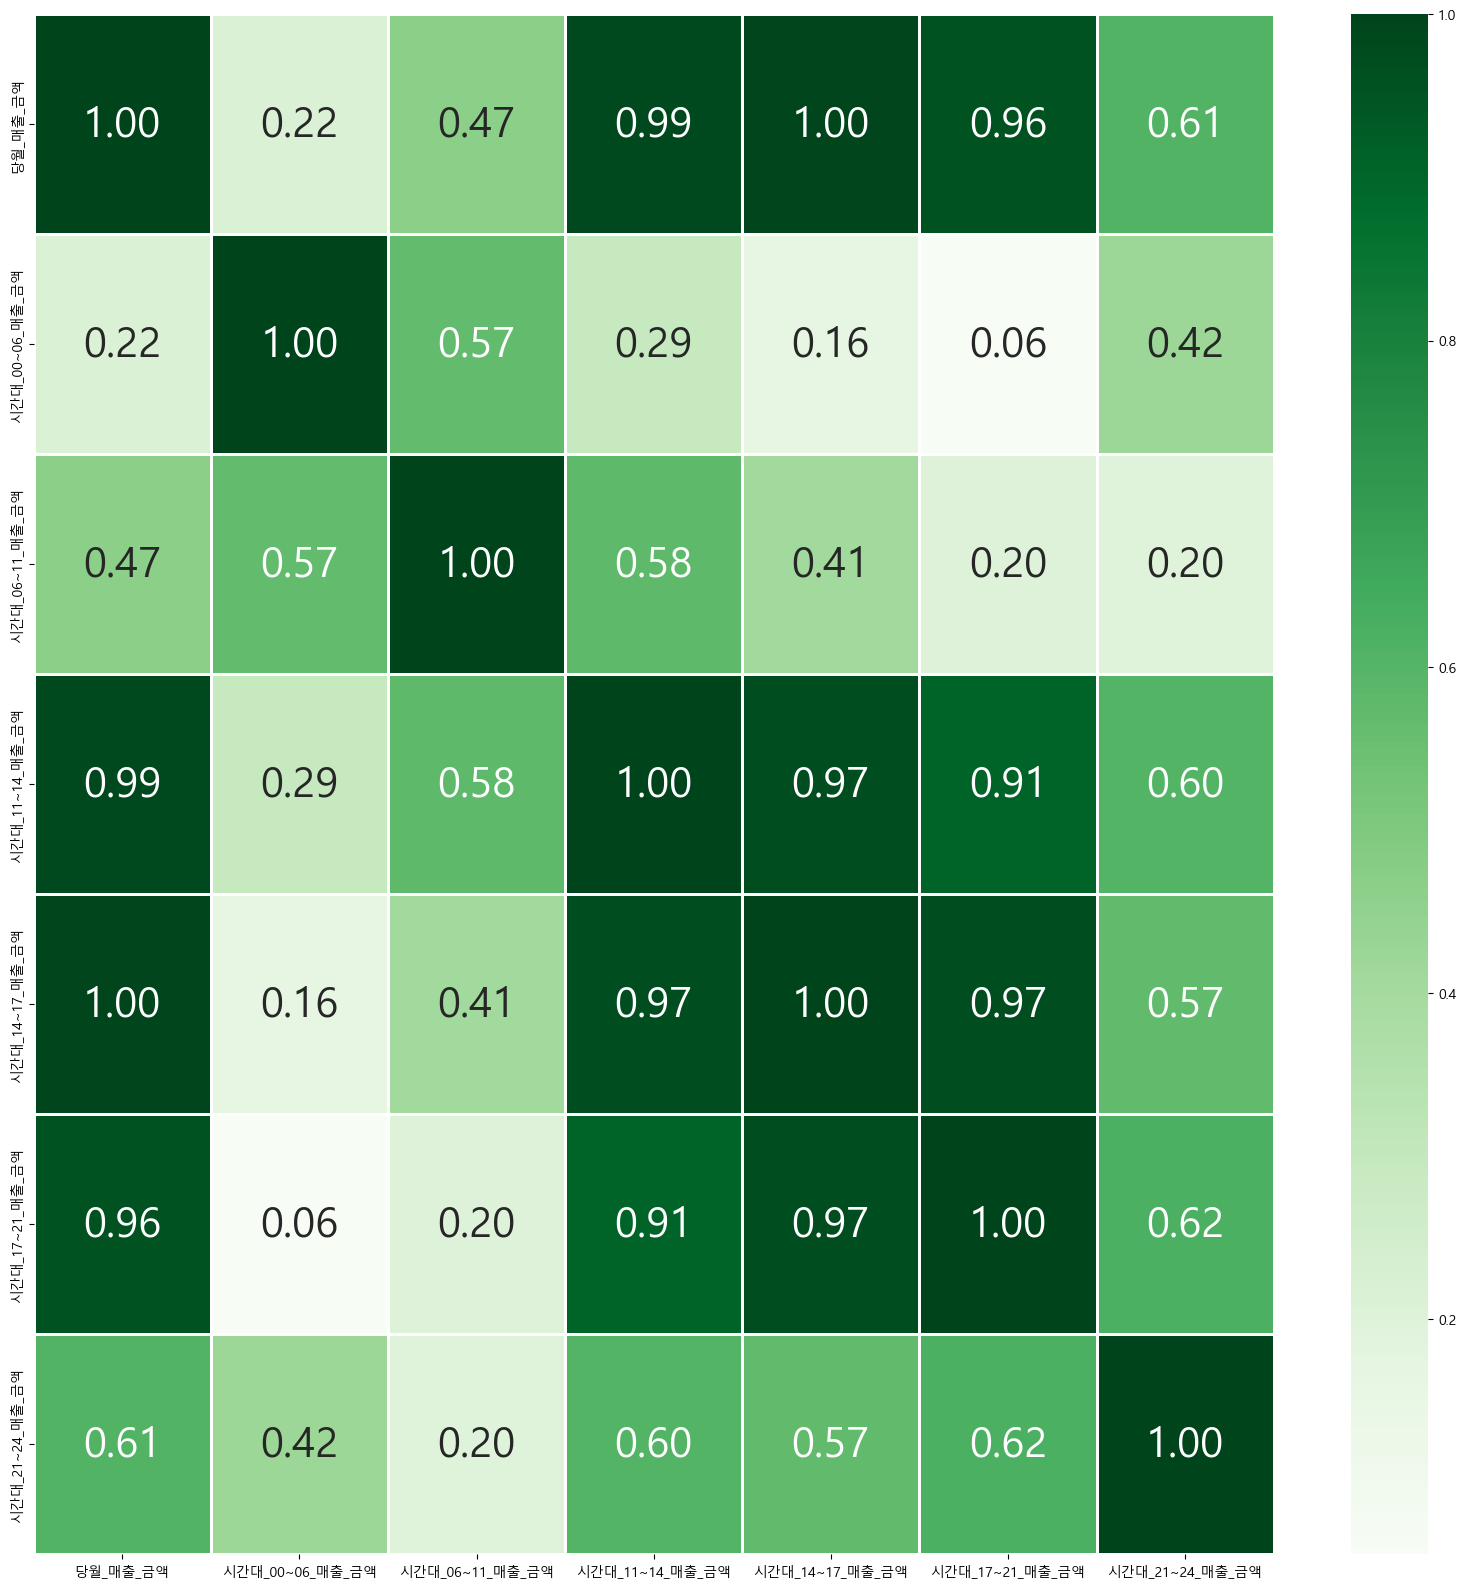

In [37]:
# 월매출과 시간대별 매출 상관분석
time=df2023[['당월_매출_금액','시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액'
            ,'시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = time, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

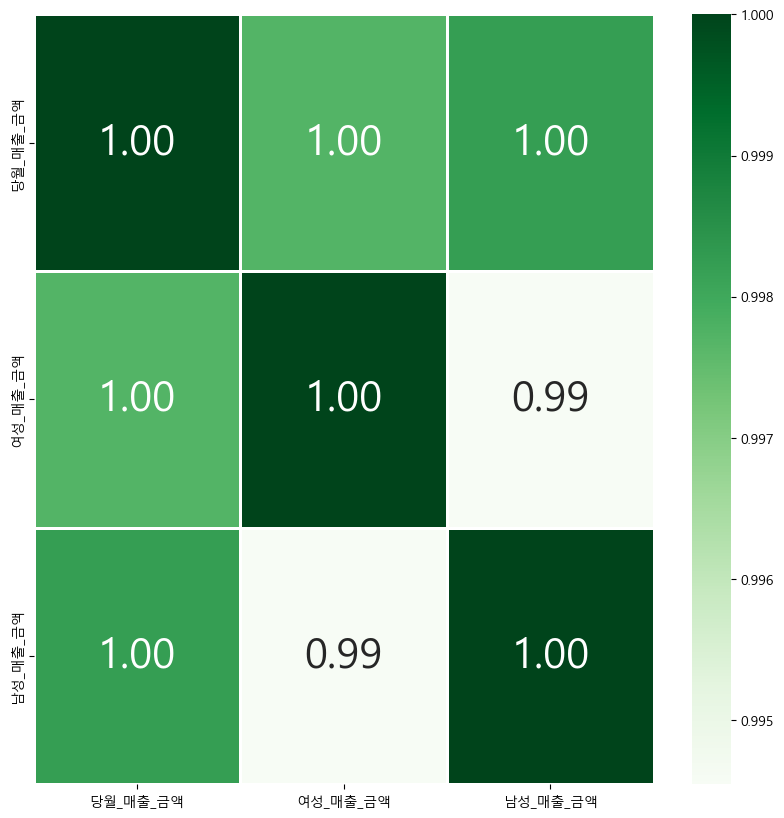

In [38]:
# 월매출과 성별별 매출 상관분석
gender=df2023[['당월_매출_금액','여성_매출_금액','남성_매출_금액']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

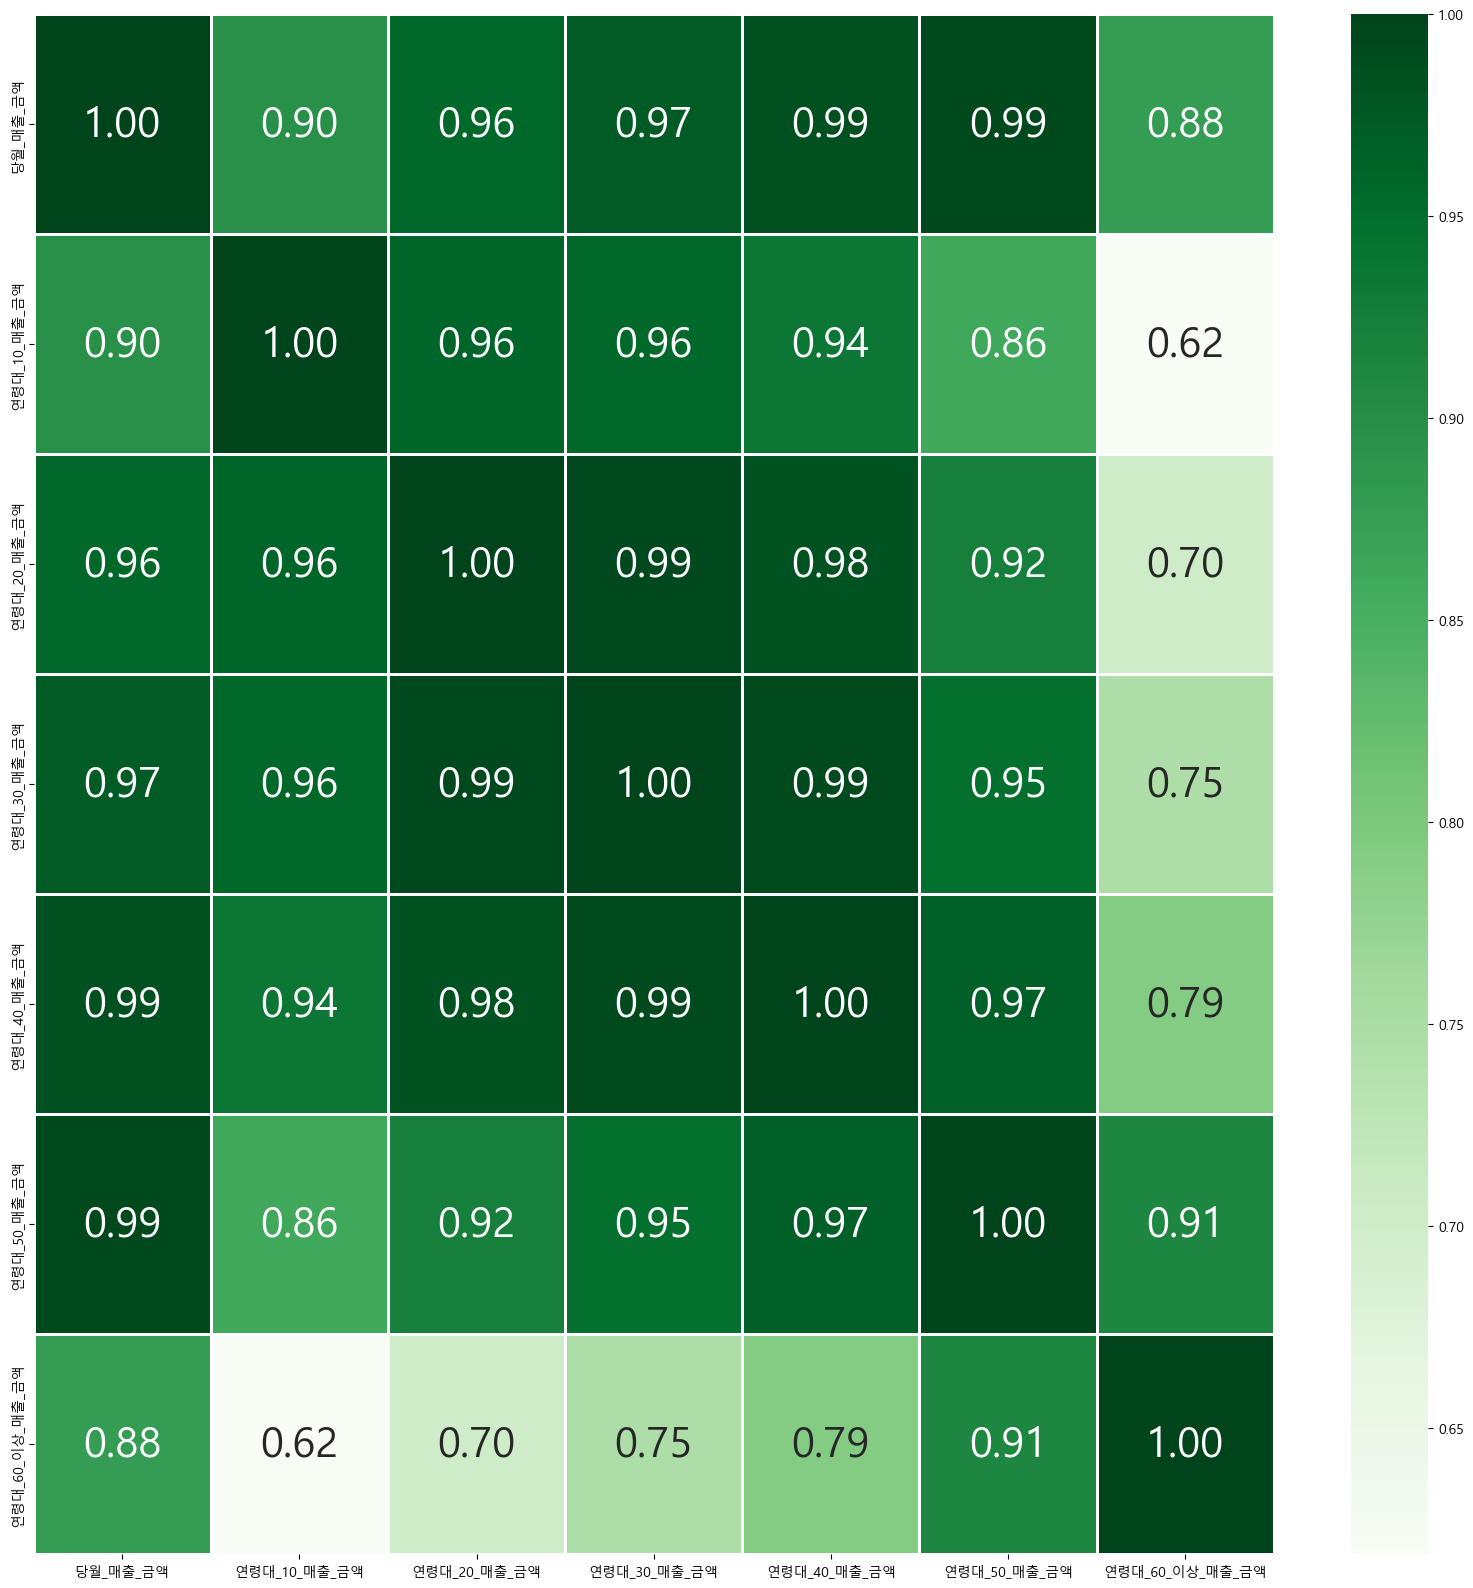

In [39]:
# 월매출과 연령대별 매출 상관분석
age=df2023[['당월_매출_금액','연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액'
           ,'연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = age, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

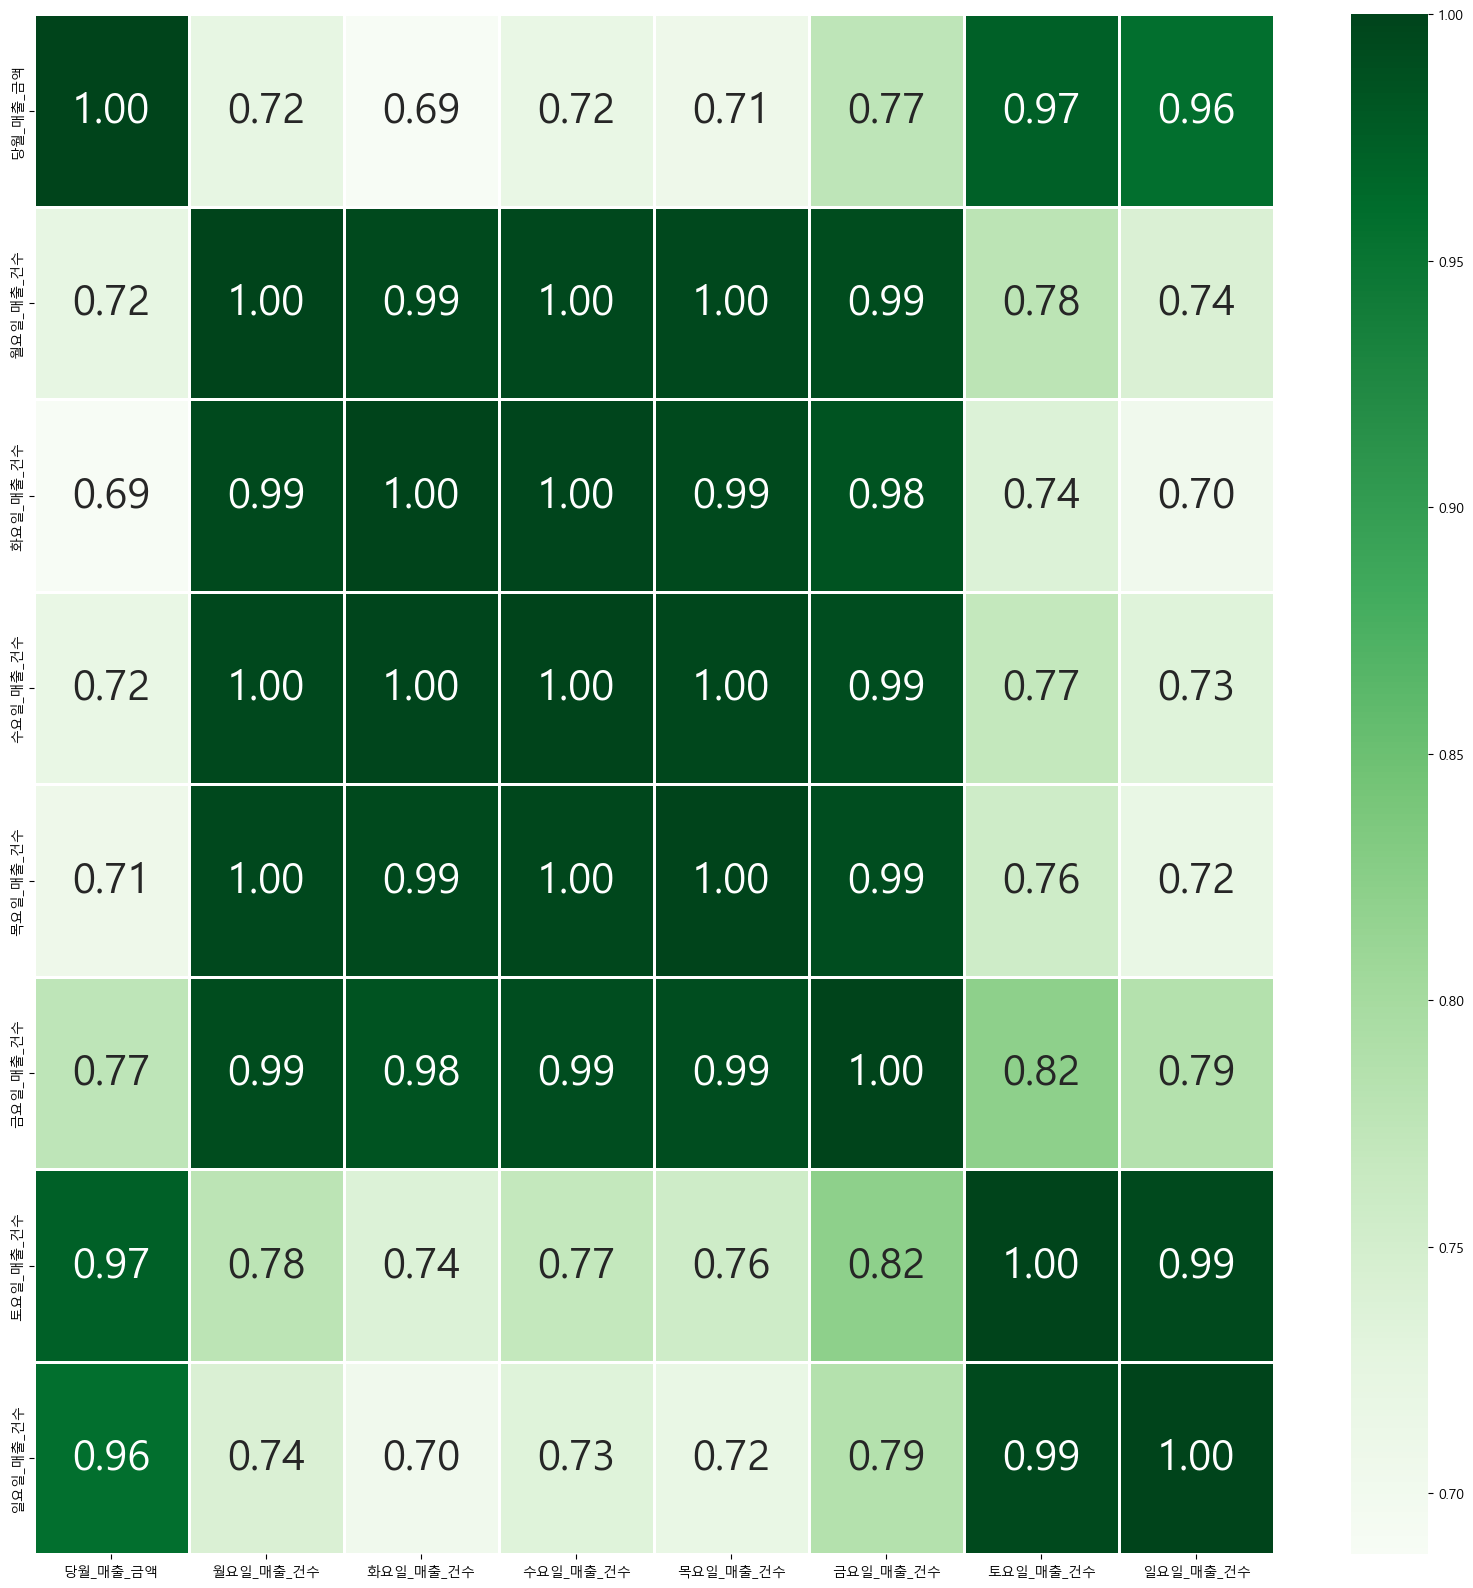

In [40]:
# 월매출과 요일별 매출건수 상관분석
week2=df2023[['당월_매출_금액','월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수','금요일_매출_건수'
       ,'토요일_매출_건수','일요일_매출_건수']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = week2, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

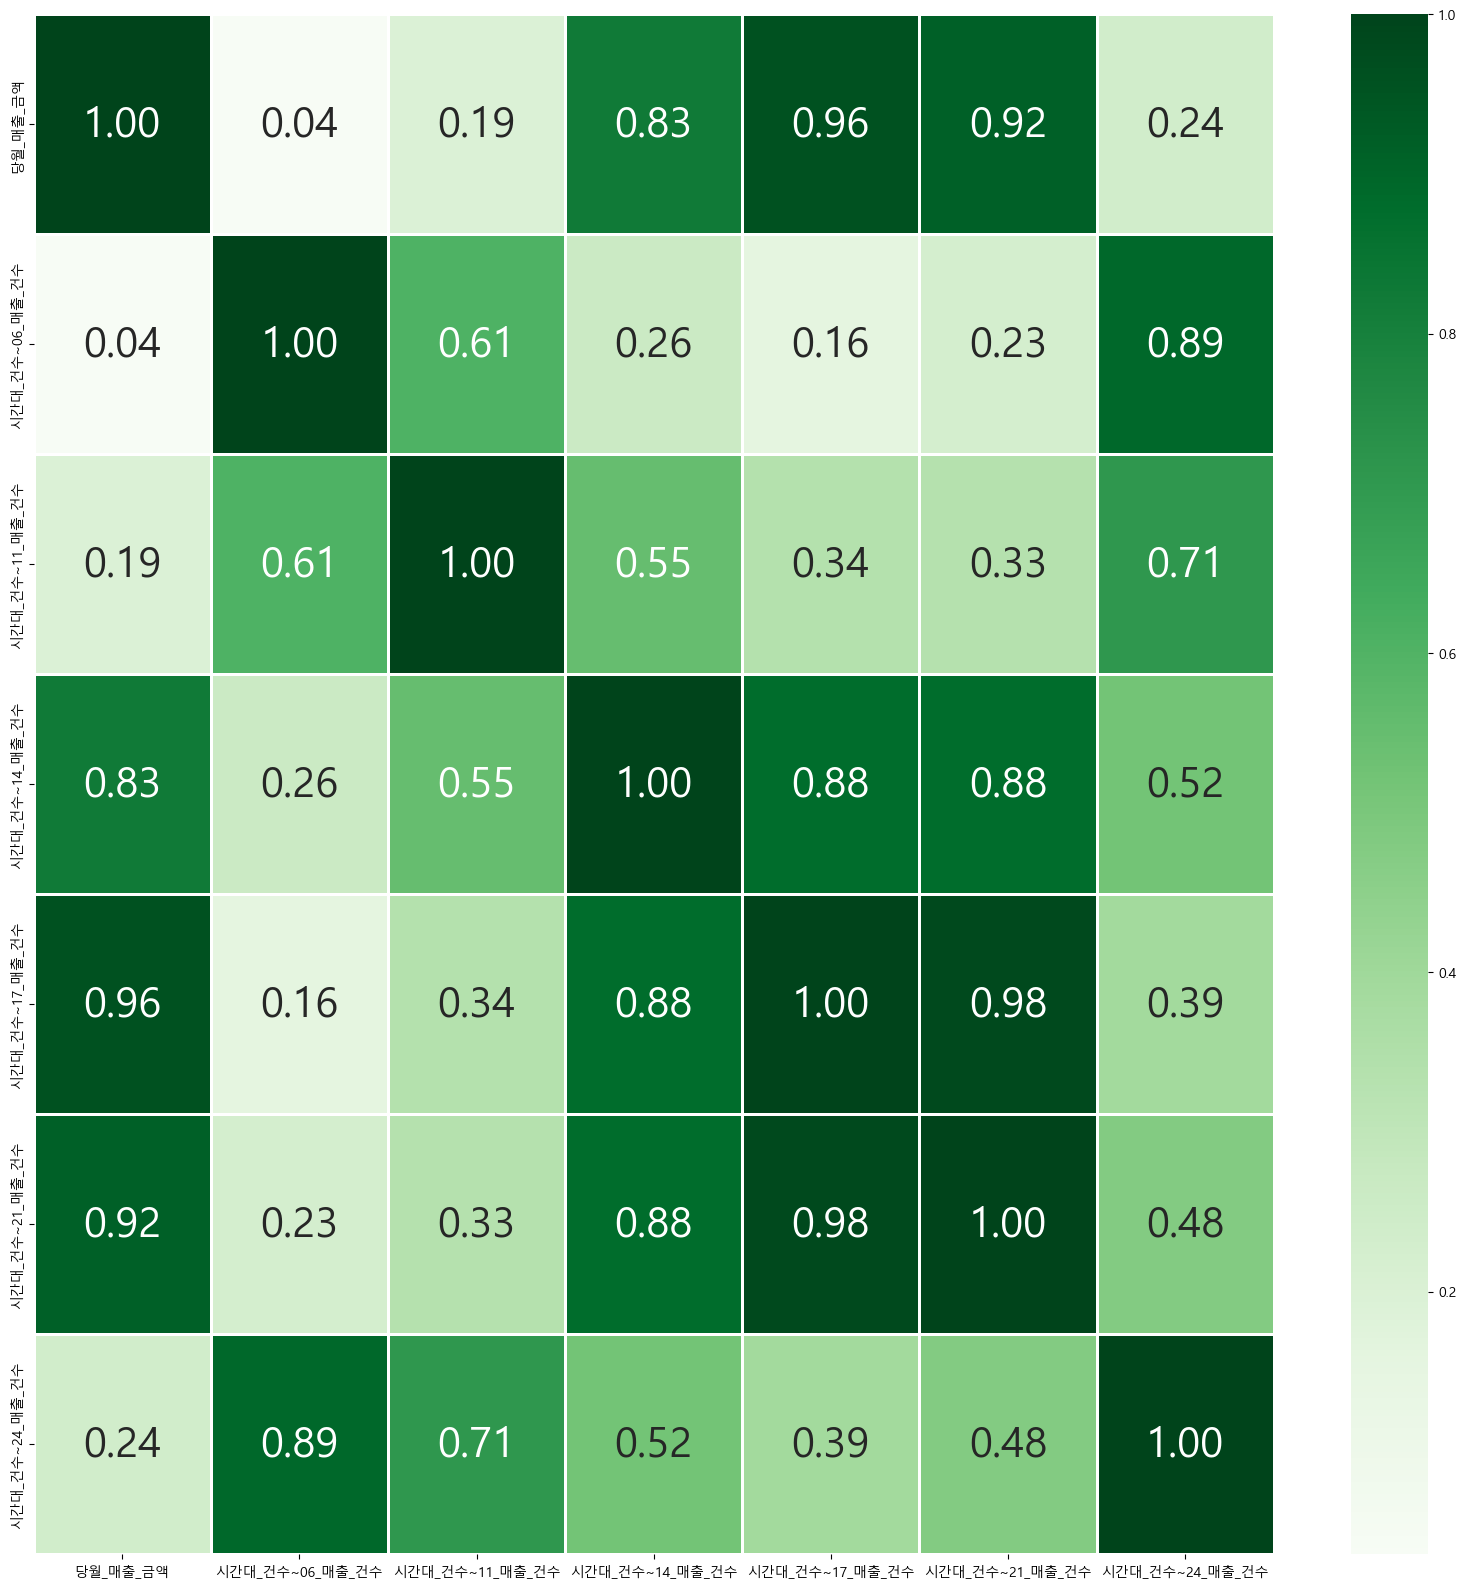

In [41]:
# 월매출과 시간대별 매출건수 상관분석
time2=df2023[['당월_매출_금액','시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수'
            ,'시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = time2, annot=True,  annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

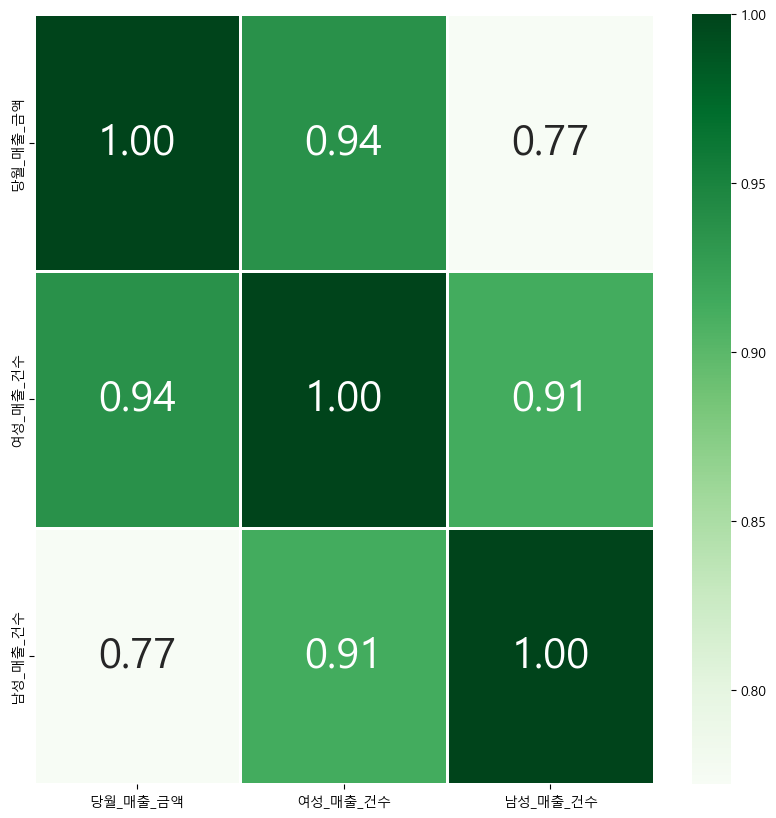

In [42]:
# 월매출과 성별별 매출건수 상관분석
gender=df2023[['당월_매출_금액','여성_매출_건수','남성_매출_건수']].corr()

plt.figure(figsize=(10,10))
sns.heatmap(data = gender, annot=True, annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

<AxesSubplot:>

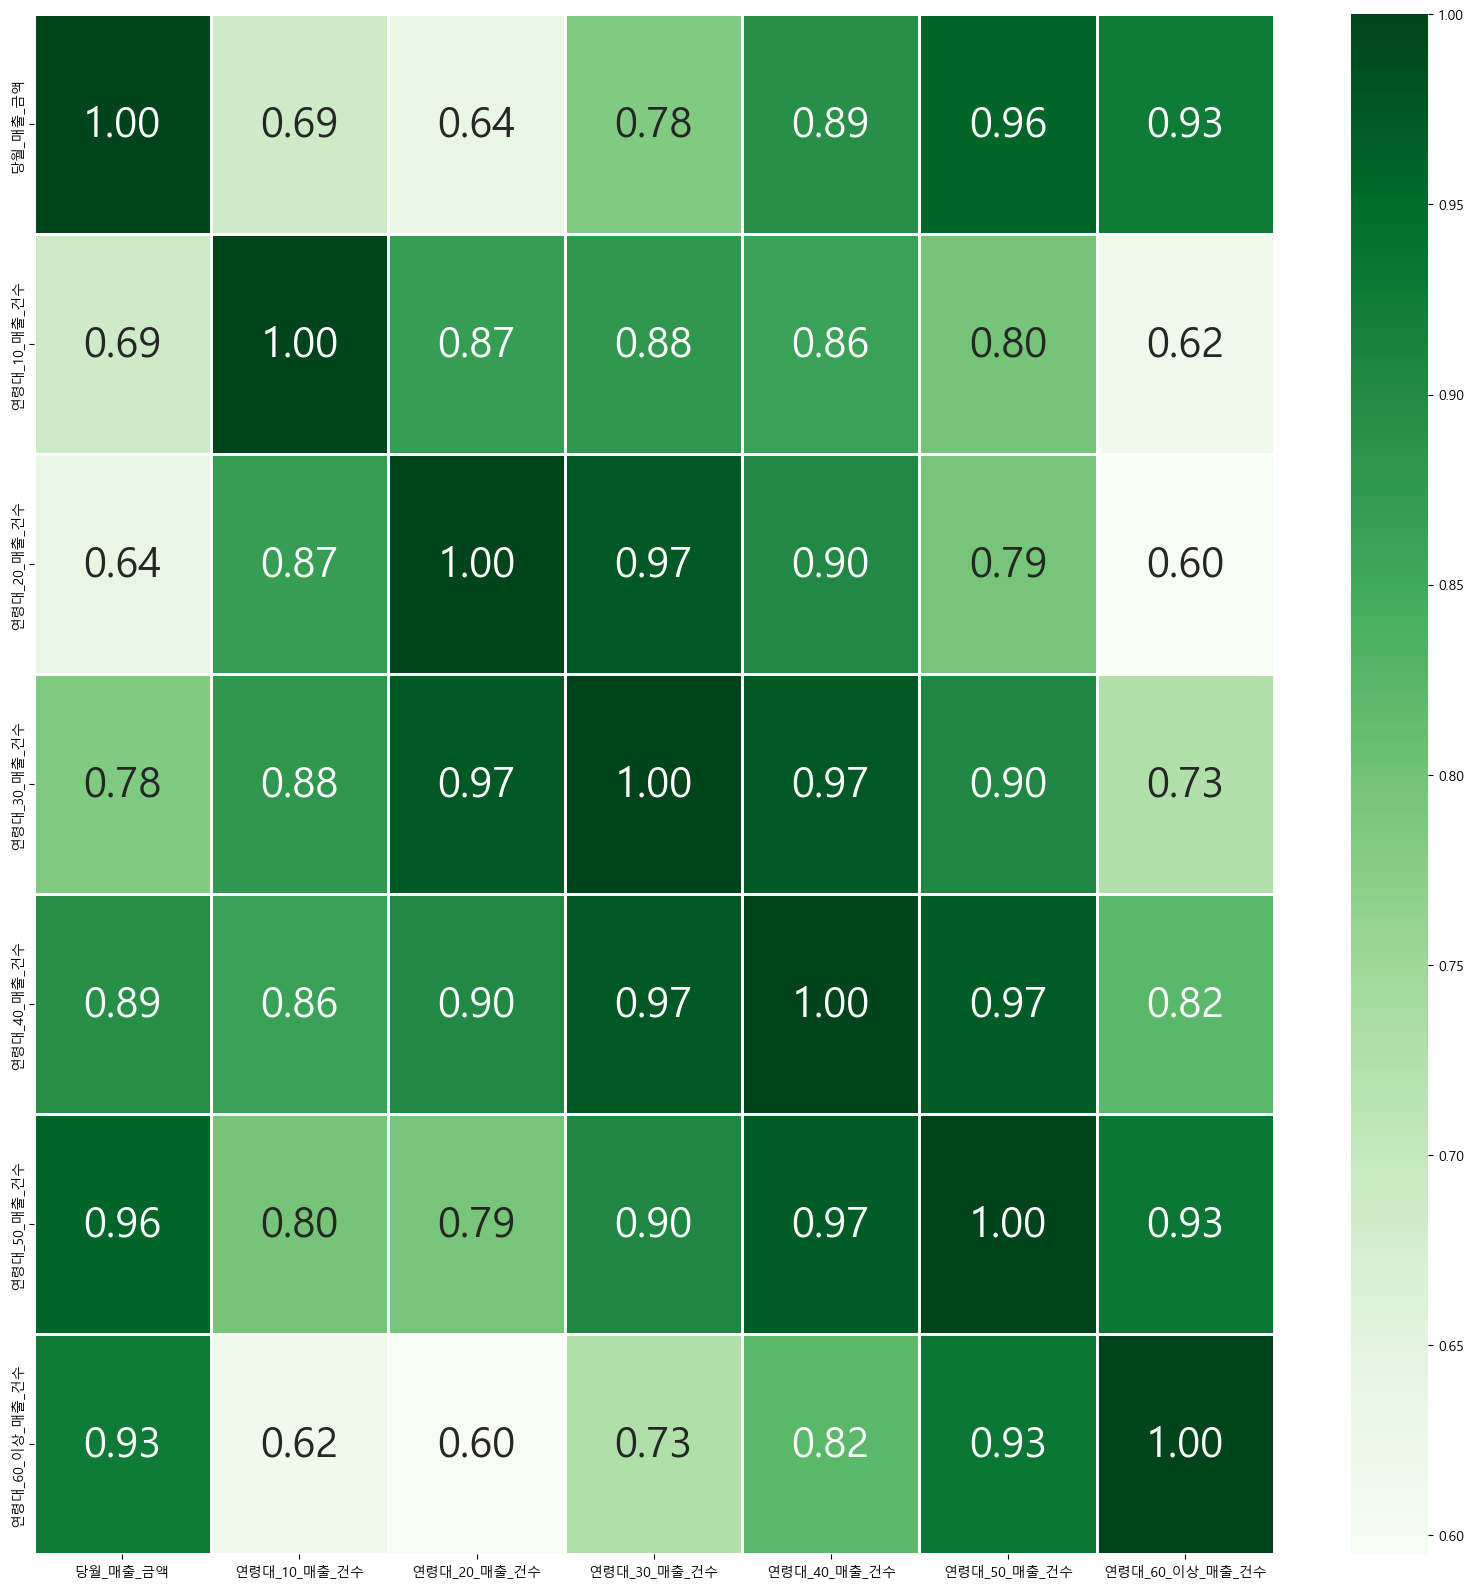

In [43]:
# 월매출과 연령대별 매출건수 상관분석
age2=df2023[['당월_매출_금액','연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수'
           ,'연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']].corr()

plt.figure(figsize=(20,20))
sns.heatmap(data = age2, annot=True,  annot_kws={"size": 30},
fmt = '.2f', linewidths=2, cmap='Greens')

In [44]:
# 독립변수 종속변수 지정
X=df2023[['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액',
          '목요일_매출_금액','금요일_매출_금액','토요일_매출_금액',
          '일요일_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액',
          '시간대_17~21_매출_금액','여성_매출_금액','남성_매출_금액',
          '연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액',
          '연령대_40_매출_금액','연령대_50_매출_금액','주중_매출_건수',
          '주말_매출_건수','토요일_매출_건수','일요일_매출_건수',
          '시간대_건수~17_매출_건수','시간대_건수~21_매출_건수',
          '여성_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']]

y=df2023['당월_매출_금액']

In [45]:
# 변수명 변경
X.columns=[['mon_mn','tues_mn','wedn_mn','thur_mn','fri_mn','satur_mn','sun_mn','11_14_mn','14_17_mn','17_21_mn','woman_mn','man_mn',
           'age10_mn','age20_mn','age30_mn','age40_mn','age50_mn','days_ct','ends_ct','fri_ct','sun_ct','17_ct','21_ct','woman_ct',
            'age50_ct','age60_ct']]

In [46]:
# 패키지 다운
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# VIF값 확인
pd.options.display.float_format = '{:.5f}'.format


vif=pd.DataFrame()
vif['features']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF Factor']=X.columns

vif=vif.sort_values('features').reset_index(drop=True)
vif

,features,VIF Factor
0,17.23252,"(age10_mn,)"
1,187.53544,"(age60_ct,)"
2,189.28052,"(mon_mn,)"
3,212.26632,"(tues_mn,)"
4,220.84087,"(thur_mn,)"
5,222.71646,"(days_ct,)"
6,266.31834,"(fri_mn,)"
7,288.09360,"(21_ct,)"
8,331.58512,"(wedn_mn,)"
9,535.33951,"(age40_mn,)"


In [48]:
# 주성분분석을 위한 패키지 다운
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   

X_sca = scaler.fit_transform(X)

In [49]:
# 주성분분석
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
printcipalComponents = pca.fit_transform(X_sca)
pcadf = pd.DataFrame(data=printcipalComponents)

In [50]:
# 주성분분석 결과
pcadf.head()

,0,1,2,3,4
0,-0.42849,0.00952,-0.15601,0.06016,-0.04904
1,-0.50028,-0.05383,-0.13361,0.01281,-0.03800
2,-0.47568,-0.06086,-0.13139,0.01697,-0.00499
3,-0.50728,-0.05050,-0.14061,0.02158,-0.04078
4,-0.49773,-0.05153,-0.13543,0.01903,-0.04093


In [51]:
# 주성분 설명력 확인
sum(pca.explained_variance_ratio_)

0.995016725097502

In [52]:
# 회귀분석 패키지 다운
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

lr=LinearRegression()

In [53]:
# 회귀분석을 위한 B_0, 상수항 추가
pcadf = sm.add_constant(pcadf, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(y,pcadf)
model2 = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               당월_매출_금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.736e+06
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:08:10   Log-Likelihood:                -50665.
No. Observations:                2423   AIC:                         1.013e+05
Df Residuals:                    2417   BIC:                         1.014e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.979e+09   5.93e+06    333.605      0.000    1.97e+09    1.99e+09
0           4.439e+09   1.21e+06   3676.104      0.000    4.44e+09    4.44e+09
1           1.684e+09   6.16e+06    273.134      0.000    1.67e+09     1.7e+09
2          -2.151e+09   7.42e+06   -290.021      0.000   -2.17e+09   -2.14e+09
3           1.254e+09   1.81e+07     69.156      0.000    1.22e+09    1.29e+09
4          -1.556e+09   2.48e+07    -62.761      0.000    -1.6e+09   -1.51e+09
==============================================================================
Omnibus:                     1970.731   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3562991.256
Skew:                           2.402   Prob(JB):                         0.00
Kurtosis:                     190.799   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# 회귀분석을 위한 B_0, 상수항 추가
X = sm.add_constant(X, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(y,X)
model1 = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               당월_매출_금액   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.102e+09
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:08:11   Log-Likelihood:                -41439.
No. Observations:                2423   AIC:                         8.293e+04
Df Residuals:                    2397   BIC:                         8.308e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.28e+05   1.47e+05     -0.871      0.384   -4.16e+05     1.6e+05
('mon_mn',)       1.0155      0.001   1252.560      0.000       1.014       1.017
('tues_mn',)      1.0115      0.001   1198.792      0.000       1.010       1.013
('wedn_mn',)      1.0032      0.001   1007.441      0.000       1.001       1.005
('thur_mn',)      0.9985      0.001   1251.433      0.000       0.997       1.000
('fri_mn',)       1.0040      0.001   1264.165      0.000       1.002       1.006
('satur_mn',)     0.9732      0.002    508.555      0.000       0.969       0.977
('sun_mn',)       1.0589      0.002    570.040      0.000       1.055       1.063
('11_14_mn',)    -0.0076      0.001    -14.549      0.000      -0.009      -0.007
('14_17_mn',)    -0.0049      0.001     -5.816      0.000      -0.007      -0.003
('17_21_mn',)    -0.0136      0.001    -16.309      0.000      -0.015      -0.012
('woman_mn',)     0.0017      0.001      3.187      0.001       0.001       0.003
('man_mn',)      -0.0030      0.000     -6.122      0.000      -0.004      -0.002
('age10_mn',)    -0.1741      0.014    -12.755      0.000      -0.201      -0.147
('age20_mn',)     0.0576      0.002     32.711      0.000       0.054       0.061
('age30_mn',)    -0.0300      0.001    -35.371      0.000      -0.032      -0.028
('age40_mn',)     0.0060      0.001     10.252      0.000       0.005       0.007
('age50_mn',)     0.0022      0.001      2.792      0.005       0.001       0.004
('days_ct',)    -71.9420      8.248     -8.723      0.000     -88.115     -55.769
('ends_ct',)   -258.5124     18.941    -13.648      0.000    -295.656    -221.369
('fri_ct',)    1663.4129     67.722     24.563      0.000    1530.614    1796.212
('sun_ct',)   -1921.9253     62.638    -30.683      0.000   -2044.755   -1799.095
('17_ct',)     -129.2929     26.481     -4.882      0.000    -181.221     -77.365
('21_ct',)      -54.4450     21.380     -2.547      0.011     -96.370     -12.520
('woman_ct',)  -172.5441     16.639    -10.370      0.000    -205.172    -139.916
('age50_ct',)  1435.1937     55.989     25.634      0.000    1325.402    1544.985
('age60_ct',)  -678.3682     37.233    -18.220      0.000    -751.380    -605.356
==============================================================================
Omnibus:                     1176.732   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           346763.401
Skew:                          -1.061   Prob(JB):                         0.00
Kurtosis:                      61.568   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+16. This